# <center>Самостійна робота №2
## <center>Виконав: студент групи ПБ-21 мп Якобчук Євгеній
## <center>Варіант №5
## <center>Загальні завдання для всіх варіантів 

1. Завантажте набір даних.

In [1]:
# Для роботи з даними
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Для роботи з Keras
from tensorflow.keras.models import Sequential # модель прямого розповсюдження
from tensorflow.keras.layers import Dense # повнозв'язні прошарки

data = pd.read_csv("E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр2/my/fetal_health_b.csv - fetal_health_b.csv.csv", sep=",")

2. Виведіть заголовок таблиці (перші 5 записів).

In [4]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,151.0,0.000,0.000,0.001,0.001,0.0,0.000,64.0,1.9,9.0,...,56.0,186.0,2.0,0.0,150.0,148.0,151.0,9.0,1.0,2.0
2,150.0,0.000,0.000,0.001,0.001,0.0,0.000,64.0,2.0,8.0,...,56.0,186.0,5.0,0.0,150.0,148.0,151.0,10.0,1.0,2.0
3,131.0,0.002,0.383,0.003,0.005,0.0,0.002,18.0,2.4,0.0,...,67.0,174.0,5.0,0.0,134.0,125.0,132.0,45.0,0.0,2.0
4,132.0,0.000,0.135,0.001,0.008,0.0,0.001,29.0,4.4,0.0,...,50.0,191.0,7.0,1.0,133.0,119.0,129.0,73.0,0.0,2.0


3. В якому форматі мітки класів?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833 entries, 0 to 4832
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4833 non-null   float64
 1   accelerations                                           4833 non-null   float64
 2   fetal_movement                                          4833 non-null   float64
 3   uterine_contractions                                    4833 non-null   float64
 4   light_decelerations                                     4833 non-null   float64
 5   severe_decelerations                                    4833 non-null   float64
 6   prolongued_decelerations                                4833 non-null   float64
 7   abnormal_short_term_variability                         4833 non-null   float64
 8   mean_value_of_short_term_variability  

Оскільки мітки класів наведені у стовпці "fetal_health", то можна зробити висновок, що дані знаходяться у форматі float64.

4. В якому форматі характеристики об’єктів? Чи є характеристики у вигляді
тексту? Якщо так, факторизувати дані в таких стовпцях.

Характеристики об'єктів знаходяться у форматі float64, і характеристик у вигляді тексту немає. Отже факторизацію даних проводити не потрібно.

5. Наскільки збалансовані класи?

In [16]:
data['fetal_health'].value_counts(normalize=True).sort_values(ascending=False)

2.0    0.366232
1.0    0.342437
3.0    0.291330
Name: fetal_health, dtype: float64

Можна зробити висновок що класи є відносно збалансовані між собою. Кількість паталогічних показників ембріонів є меншою ніж при нормальному та тривожному станах.

6. Створити навчальний набір предикторів X та цілей Y. Перетворити мітки класів
до формату One hot encoding.

In [2]:
X = data.drop('fetal_health', axis = 1)
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,151.0,0.000,0.000,0.001,0.001,0.0,0.000,64.0,1.9,9.0,...,130.0,56.0,186.0,2.0,0.0,150.0,148.0,151.0,9.0,1.0
2,150.0,0.000,0.000,0.001,0.001,0.0,0.000,64.0,2.0,8.0,...,130.0,56.0,186.0,5.0,0.0,150.0,148.0,151.0,10.0,1.0
3,131.0,0.002,0.383,0.003,0.005,0.0,0.002,18.0,2.4,0.0,...,107.0,67.0,174.0,5.0,0.0,134.0,125.0,132.0,45.0,0.0
4,132.0,0.000,0.135,0.001,0.008,0.0,0.001,29.0,4.4,0.0,...,141.0,50.0,191.0,7.0,1.0,133.0,119.0,129.0,73.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,140.0,0.000,0.000,0.008,0.000,0.0,0.000,79.0,0.3,20.0,...,26.0,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0
4829,140.0,0.000,0.000,0.006,0.001,0.0,0.000,79.0,0.5,26.0,...,21.0,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0
4830,140.0,0.000,0.000,0.007,0.001,0.0,0.000,79.0,0.6,27.0,...,26.0,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0
4831,140.0,0.000,0.000,0.005,0.001,0.0,0.000,77.0,0.7,17.0,...,31.0,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0


Створимо змінну У, якій відповідає клас "fetal_health", та перетворимо мітки класів
до формату One hot encoding.

In [3]:
Y = pd.get_dummies(data.fetal_health, prefix='Fetal Health')
Y

,Fetal Health_1.0,Fetal Health_2.0,Fetal Health_3.0
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4828,1,0,0
4829,1,0,0
4830,1,0,0
4831,1,0,0


7. Розбити набір даних на навчальну та тестову множини.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

Набір даних було розділено на навчальну і тестову множини.

8. Стандартизувати предиктори X

In [5]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

Була проведена стандартизація значень змінних Х.

9. Створити модель нейронної мережі прямого розповсюдження. Обрати
архітектуру, активаційні функції, оптимізатор, критерії якості та метрики. Якщо
даних мало, під час навчання не використовувати валідаційну множину.

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

10. Навчити нейронну мережу (кілька разів?).

In [7]:
history1 = model.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16)

Epoch 1/50
219/219 [==============================] - 0s 2ms/step - loss: 0.9388 - accuracy: 0.5597 - val_loss: 0.7864 - val_accuracy: 0.6840
Epoch 2/50
219/219 [==============================] - 0s 707us/step - loss: 0.6874 - accuracy: 0.7436 - val_loss: 0.5024 - val_accuracy: 0.8266
Epoch 3/50
219/219 [==============================] - 0s 636us/step - loss: 0.4399 - accuracy: 0.8453 - val_loss: 0.3865 - val_accuracy: 0.8655
Epoch 4/50
219/219 [==============================] - 0s 716us/step - loss: 0.3822 - accuracy: 0.8605 - val_loss: 0.3559 - val_accuracy: 0.8590
Epoch 5/50
219/219 [==============================] - 0s 713us/step - loss: 0.3565 - accuracy: 0.8677 - val_loss: 0.3405 - val_accuracy: 0.8671
Epoch 6/50
219/219 [==============================] - 0s 620us/step - loss: 0.3352 - accuracy: 0.8760 - val_loss: 0.3170 - val_accuracy: 0.8833
Epoch 7/50
219/219 [==============================] - 0s 663us/step - loss: 0.3211 - accuracy: 0.8869 - val_loss: 0.3087 - val_accuracy: 0

In [24]:
history2 = model.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16, verbose=2)

Epoch 1/50
219/219 - 0s - loss: 0.1547 - accuracy: 0.9510 - val_loss: 0.1679 - val_accuracy: 0.9498
Epoch 2/50
219/219 - 0s - loss: 0.1506 - accuracy: 0.9522 - val_loss: 0.1707 - val_accuracy: 0.9384
Epoch 3/50
219/219 - 0s - loss: 0.1505 - accuracy: 0.9502 - val_loss: 0.1676 - val_accuracy: 0.9481
Epoch 4/50
219/219 - 0s - loss: 0.1498 - accuracy: 0.9502 - val_loss: 0.1658 - val_accuracy: 0.9481
Epoch 5/50
219/219 - 0s - loss: 0.1477 - accuracy: 0.9533 - val_loss: 0.1648 - val_accuracy: 0.9498
Epoch 6/50
219/219 - 0s - loss: 0.1476 - accuracy: 0.9516 - val_loss: 0.1664 - val_accuracy: 0.9498
Epoch 7/50
219/219 - 0s - loss: 0.1455 - accuracy: 0.9527 - val_loss: 0.1643 - val_accuracy: 0.9514
Epoch 8/50
219/219 - 0s - loss: 0.1447 - accuracy: 0.9516 - val_loss: 0.1675 - val_accuracy: 0.9481
Epoch 9/50
219/219 - 0s - loss: 0.1432 - accuracy: 0.9536 - val_loss: 0.1716 - val_accuracy: 0.9449
Epoch 10/50
219/219 - 0s - loss: 0.1429 - accuracy: 0.9539 - val_loss: 0.1645 - val_accuracy: 0.9449

11. Оцінити якість роботи навченої мережі на тестовій множині.

In [8]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Втрати: 0.18296818435192108
Доля правильних відповідей: 0.931034505367279


12. Побудувати графік залежності критерію якості (або метрики) від номеру ітерації
навчання. Проаналізувати графік і, за потреби, перенавчити мережу, врахувавши
отриману інформацію.

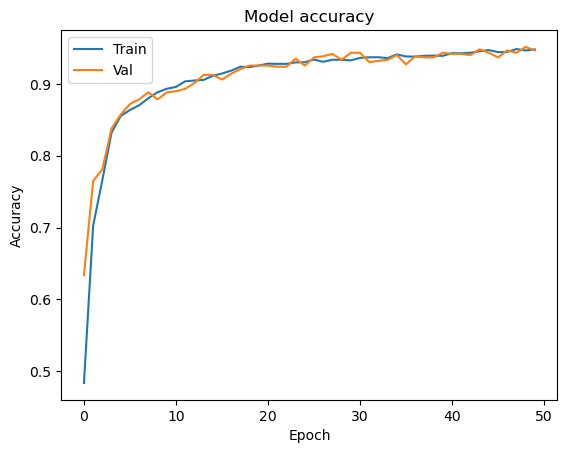

In [28]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

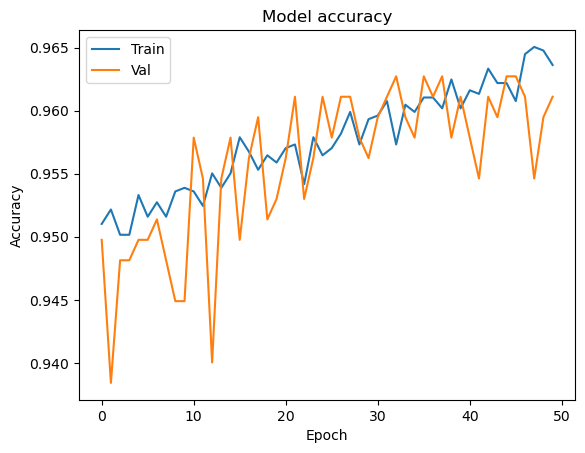

In [29]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Отже, при аналізі графіків можна стверджувати, що при 2 навчанні нейронної мережі точніть обробки надзвичайно сильно підвищилась. Можна спостерігати, що на 2 графіку діапазони точності починаються в значеннях 0.94-0.95.

13. Подати на вхід навченої мережі довільний зразок із тестової вибірки. За
результатами вивести наступне повідомлення: «Передбачено клас {мітка класу}
з достовірністю {Р}%».

In [35]:
sample = X_test[0:1]
prediction = model.predict(sample)
print(prediction)

[[9.8856318e-01 1.1436843e-02 2.5396118e-11]]


Створено модель для класифікації зразка з тестової вибірки.

In [36]:
score = np.max(prediction)
prediction = np.argmax(prediction)

print(f'Передбачено клас: {prediction} з достовірністю {score*100:.2f}%', f'Повинно бути: {np.argmax(Y_test[0:1])}', sep='\n')

Передбачено клас: 0 з достовірністю 98.86%
Повинно бути: 0
